# Example of Comparing All Implemented Outlier Detection Thresholders

The thresholders covered in this example include:

1. **IQR: Inter-Quartile Region** 
2. **MAD: Median Absolute Deviation**
3. **FWFM: Full Width at Full Minimum**
4. **YJ: Yeo-Johnson Transformation**
5. **ZSCORE: Z Score**
6. **AUCP: Area Under the Curve Percentage**
7. **QMCD: Quasi-Monte Carlo Discreperancy**
8. **FGD: Fixed Gradient Descent**
9. **DSN: Distance Shift from Normal**
10. **CLF: Trained Classifier**
11. **FILTER: Filtering Based**
12. **WIND: Topological Winding Number**
13. **EB: Elliptical Boundary**
14. **REGR: Regression Intercept**
15. **BOOT: Bootstrap Method**
16. **MCST: Monte Carlo Statistical Tests**
17. **HIST: Histogram Based Methods**
18. **MOLL: Mollifier**
19. **CHAU: Chauvenet's Criterion**
20. **GESD: Generalized Extreme Studentized Deviate**
21. **MTT: Modified Thompson Tau Test**
22. **KARCH: Karcher Mean**
23. **OCSVM: One-Class SVM**
24. **CLUST: Clustering**



In [3]:
from __future__ import division
from __future__ import print_function

import os
import sys
from time import time

# temporary solution for relative imports in case pyod is not installed
# if pythresh is installed, no need to use the following line
sys.path.append(
    os.path.abspath(os.path.join(os.path.dirname("__file__"), '..')))

import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import matplotlib.font_manager

from pyod.models.sampling import Sampling
from pyod.models.kde import KDE
from pyod.models.knn import KNN
from pyod.models.mcd import MCD
from pyod.models.iforest import IForest

from pythresh.thresholds.iqr import IQR
from pythresh.thresholds.mad import MAD
from pythresh.thresholds.fwfm import FWFM
from pythresh.thresholds.yj import YJ
from pythresh.thresholds.zscore import ZSCORE
from pythresh.thresholds.aucp import AUCP
from pythresh.thresholds.qmcd import QMCD
from pythresh.thresholds.fgd import FGD
from pythresh.thresholds.dsn import DSN
from pythresh.thresholds.clf import CLF
from pythresh.thresholds.filter import FILTER
from pythresh.thresholds.wind import WIND
from pythresh.thresholds.eb import EB
from pythresh.thresholds.regr import REGR
from pythresh.thresholds.boot import BOOT
from pythresh.thresholds.mcst import MCST
from pythresh.thresholds.hist import HIST
from pythresh.thresholds.moll import MOLL
from pythresh.thresholds.chau import CHAU
from pythresh.thresholds.gesd import GESD
from pythresh.thresholds.mtt import MTT
from pythresh.thresholds.karch import KARCH
from pythresh.thresholds.ocsvm import OCSVM
from pythresh.thresholds.clust import CLUST

In [4]:
# Define the number of inliers and outliers
n_samples = 200
outliers_fraction = 0.25
clusters_separation = [1.5]

# Compare given detectors under given settings
# Initialize the data
xx, yy = np.meshgrid(np.linspace(-7, 7, 100), np.linspace(-7, 7, 100))
n_inliers = int((1. - outliers_fraction) * n_samples)
n_outliers = int(outliers_fraction * n_samples)
ground_truth = np.zeros(n_samples, dtype=int)
ground_truth[-n_outliers:] = 1


In [5]:
# Show the statics of the data
print('Number of inliers: %i' % n_inliers)
print('Number of outliers: %i' % n_outliers)
print('Ground truth shape is {shape}. Outlier are 1 and inliers are 0.\n'.format(shape=ground_truth.shape))
print(ground_truth)

Number of inliers: 150
Number of outliers: 50
Ground truth shape is (200,). Outlier are 1 and inliers are 0.

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [6]:
random_state = np.random.RandomState(42)
# Define seventeen outlier detection thresholders to be compared
thresholders = {
    'Inter-Quartile Region (IQR)':IQR(),
    'Median Absolute Deviation (MAD)':MAD(),
    'Full Width at Full Minimum (FWFM)':FWFM(),
    'Yeo-Johnson Transformation (YJ)': YJ(),
    'Z Score (ZSCORE)': ZSCORE(),
    'AUC Percentage (AUCP)': AUCP(),
    'Quasi-Monte Carlo Discreperancy (QMCD)': QMCD(),
    'Fixed Gradient Descent (FGD)': FGD(),
    'Distance Shift from Normal (DSN)': DSN(),
    'Trained Classifier (CLF)': CLF(),
    'Filtering Based (FILTER)': FILTER(),
    'Topological Winding Number (WIND)': WIND(),
    'Elliptical Boundary (EB)': EB(),
    'Regression Intercept (REGR)': REGR(),
    'Bootstrap Method (BOOT)': BOOT(),
    'Monte Carlo Statistical Tests (MCST)': MCST(),
    'Histogram Based Methods (HIST)': HIST(),
    'Mollifier (MOLL)': MOLL(),
    "Chauvenet's Criterion (CHAU)": CHAU(),
    'Generalized Extreme Studentized Deviate (GESD)': GESD(),
    'Modified Thompson Tau Test (MTT)': MTT(),
    'Karcher Mean (KARCH)': KARCH(),
    'One-Class SVM (OCSVM)': OCSVM(),
    'Clustering (CLUST)': CLUST()
}

In [7]:
# Show all thresholders
for i, thres in enumerate(thresholders.keys()):
    print('Thresholder', i + 1, thres)

Thresholder 1 Inter-Quartile Region (IQR)
Thresholder 2 Median Absolute Deviation (MAD)
Thresholder 3 Full Width at Full Minimum (FWFM)
Thresholder 4 Yeo-Johnson Transformation (YJ)
Thresholder 5 Z Score (ZSCORE)
Thresholder 6 AUC Percentage (AUCP)
Thresholder 7 Quasi-Monte Carlo Discreperancy (QMCD)
Thresholder 8 Fixed Gradient Descent (FGD)
Thresholder 9 Distance Shift from Normal (DSN)
Thresholder 10 Trained Classifier (CLF)
Thresholder 11 Filtering Based (FILTER)
Thresholder 12 Topological Winding Number (WIND)
Thresholder 13 Elliptical Boundary (EB)
Thresholder 14 Regression Intercept (REGR)
Thresholder 15 Bootstrap Method (BOOT)
Thresholder 16 Monte Carlo Statistical Tests (MCST)
Thresholder 17 Histogram Based Methods (HIST)
Thresholder 18 Mollifier (MOLL)
Thresholder 19 Chauvenet's Criterion (CHAU)
Thresholder 20 Generalized Extreme Studentized Deviate (GESD)
Thresholder 21 Modified Thompson Tau Test (MTT)
Thresholder 22 Karcher Mean (KARCH)
Thresholder 23 One-Class SVM (OCSVM)


1 fitting Inter-Quartile Region (IQR) : outliers detected 10.0 %
2 fitting Median Absolute Deviation (MAD) : outliers detected 24.5 %
3 fitting Full Width at Full Minimum (FWFM) : outliers detected 19.0 %
4 fitting Yeo-Johnson Transformation (YJ) : outliers detected 24.0 %
5 fitting Z Score (ZSCORE) : outliers detected 21.5 %
6 fitting AUC Percentage (AUCP) : outliers detected 24.0 %
7 fitting Quasi-Monte Carlo Discreperancy (QMCD) : outliers detected 5.0 %
8 fitting Fixed Gradient Descent (FGD) : outliers detected 24.0 %
9 fitting Distance Shift from Normal (DSN) : outliers detected 22.5 %
10 fitting Trained Classifier (CLF) : outliers detected 23.5 %
11 fitting Filtering Based (FILTER) : outliers detected 22.0 %
12 fitting Topological Winding Number (WIND) : outliers detected 24.0 %
13 fitting Elliptical Boundary (EB) : outliers detected 24.0 %
14 fitting Regression Intercept (REGR) : outliers detected 19.0 %
15 fitting Bootstrap Method (BOOT) : outliers detected 25.5 %
16 fitting Mo

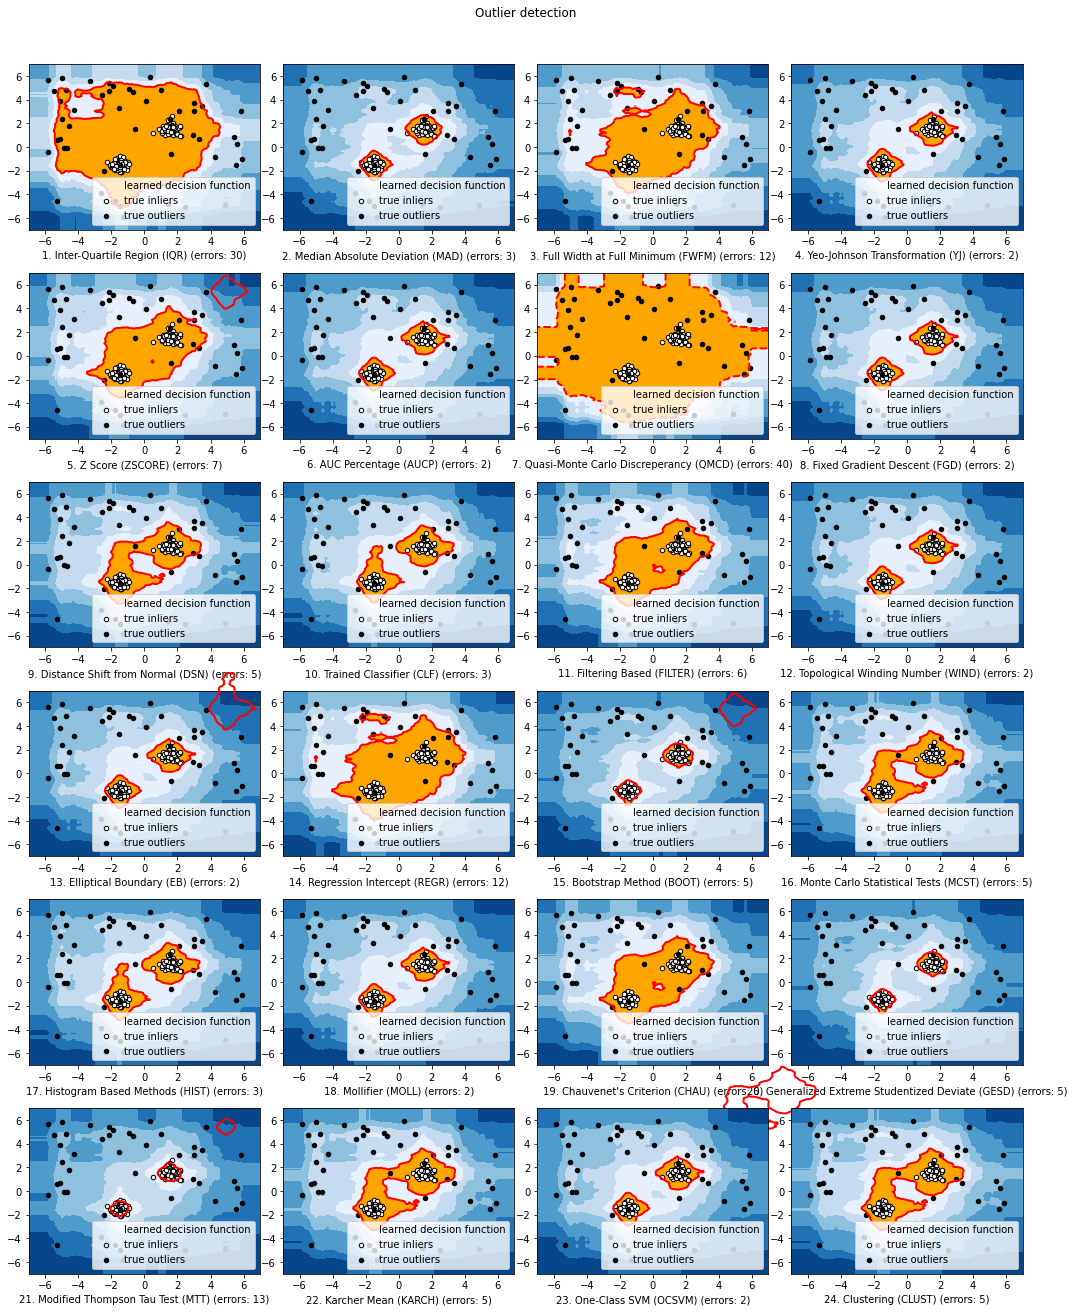

In [9]:
# Fit the models with the generated data and 
# compare model performances

clf = IForest()

for i, offset in enumerate(clusters_separation):
    np.random.seed(42)
    # Data generation
    X1 = 0.3 * np.random.randn(n_inliers // 2, 2) - offset
    X2 = 0.3 * np.random.randn(n_inliers // 2, 2) + offset
    X = np.r_[X1, X2]
    # Add outliers
    X = np.r_[X, np.random.uniform(low=-6, high=6, size=(n_outliers, 2))]
    
    # Fit model
    clf.fit(X)
    scores = clf.decision_scores_ 
    scores_pred = clf.decision_function(X) * -1

    # Evaluate scores
    plt.figure(figsize=(15, 20))
    for i, (thres_name, thres) in enumerate(thresholders.items()):
        
        # Evaluate the detection scores and tag outliers
        y_pred = thres.eval(scores)
        print(i + 1, 'fitting', thres_name, ': outliers detected', 100*sum(y_pred)/len(y_pred), '%')
    
        threshold = percentile(scores_pred, 100 * sum(y_pred)/len(y_pred))
        n_errors = (y_pred != ground_truth).sum()
        # plot the levels lines and the points

        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
        Z = Z.reshape(xx.shape)
        subplot = plt.subplot(6, 4, i + 1)
        subplot.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
                         cmap=plt.cm.Blues_r)
        a = subplot.contour(xx, yy, Z, levels=[threshold],
                            linewidths=2, colors='red')
        subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],
                         colors='orange')
        b = subplot.scatter(X[:-n_outliers, 0], X[:-n_outliers, 1], c='white',
                            s=20, edgecolor='k')
        c = subplot.scatter(X[-n_outliers:, 0], X[-n_outliers:, 1], c='black',
                            s=20, edgecolor='k')
        subplot.axis('tight')
        subplot.legend(
            [a.collections[0], b, c],
            ['learned decision function', 'true inliers', 'true outliers'],
            prop=matplotlib.font_manager.FontProperties(size=10),
            loc='lower right')
        subplot.set_xlabel("%d. %s (errors: %d)" % (i + 1, thres_name, n_errors))
        subplot.set_xlim((-7, 7))
        subplot.set_ylim((-7, 7))
    plt.subplots_adjust(0.04, 0.1, 0.96, 0.94, 0.1, 0.26)
    plt.suptitle("Outlier detection")
plt.show()